In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
col_width = 7.141
plt.style.use(['./figures.mplstyle'])

# Existing Reading and Helping Functions

In [5]:
minutes = [5]
devices = list(range(100, 6400, 100)) + [350]
bitlistIntervals = [2000, 10000]
moves = [False]
uniforms = [True]
broadcastTypes = ['smart', 'simple']
spacings = [2, 3, 5, 7, 10, 15]
rates = [30000, 60000, 120000]

data = {}
for minute in minutes:
    for device in devices:
        for bitlist in bitlistIntervals:
            for move in moves:
                for uniform in uniforms:
                    for broadcastType in broadcastTypes:
                        for space in spacings:
                            for rate in rates:
                                file_name = 'minutes_{minutes}_numDevices_{num_devices}_bitListInterval_{bitlist}_move_{move}_uniform_{uniform}_broadcastType_{broadcastType}_uniformSpacing_{space}_sendRate_{rate}.csv'.format(
                                    space=space, 
                                    num_devices=device, 
                                    minutes=minute, 
                                    bitlist=bitlist, 
                                    move=move, 
                                    uniform=uniform,
                                    broadcastType=broadcastType,
                                    rate=rate)
                                try:
                                    data[(minute, device, bitlist, move, uniform, broadcastType, space, rate)] = pd.read_csv('./delivery/' + file_name)
                                except Exception as e:
                                    # no data for this combo
                                    continue


# Graph

Should the different thresholds be on the same graph? Or should spacing or num devices be the different lines for a given threshold?

Messages seem to be delivered too fast. 500 people with 10 ft spacing and 30ft range - bitlists sent every 10 seconds => 3 people in range if horizonal/vertical and 2 if diagonal. Diameter of ~23.

23/3 ~= 8 hops. Maybe there's enough people that bitlists do propogate fast enough?

In [6]:
def get_cdf(df, col):
    sorted_data = np.sort(df[col])
    sorted_data_cdf = np.arange(len(sorted_data))/float(len(sorted_data)) * 100
    
    return sorted_data, sorted_data_cdf

def delivery_cdf(data, params, threshold):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('seconds')
    ax.set_ylabel('% Data')
#     ax.set_title('{space} ft Delivery CDF'.format(space=params['space']))
    
    for device in params['devices']:
        df = data[(params['minute'], 
                   device, 
                   params['bitlist'], 
                   params['move'], 
                   params['uniform'], 
                   params['broadcastType'],
                   params['space'], 
                   params['rate'])]
        delivery_times = df[df['threshold'] == threshold]
        x, y = get_cdf(delivery_times, 'seconds')
        ax.plot(x, y, label='{device} devices'.format(device=device))

    ax.legend()
    
    name = 'delivery_minutes_{minutes}_bitListInterval_{bitlist}_move_{move}_uniform_{uniform}_uniformSpacing_{space}_sendRate_{rate}.pdf'.format(
                                space=params['space'],  
                                minutes=params['minute'], 
                                bitlist=params['bitlist'], 
                                move=params['move'], 
                                uniform=params['uniform'], 
                                rate=params['rate'])
    
    plt.savefig('./Figures/delivery/' + name, bbox_inches = 'tight',
    pad_inches = 0.1, format='pdf')
    plt.show()


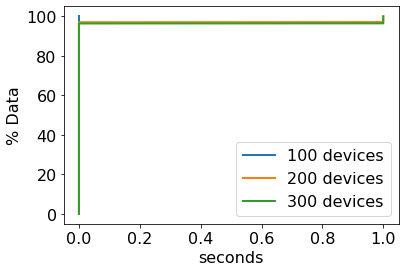

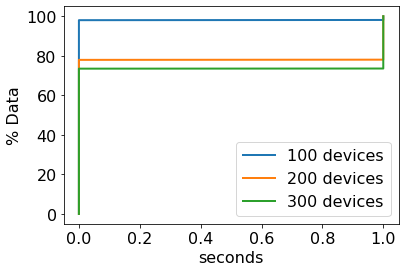

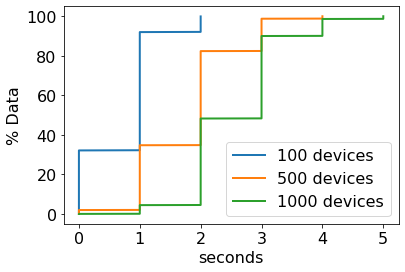

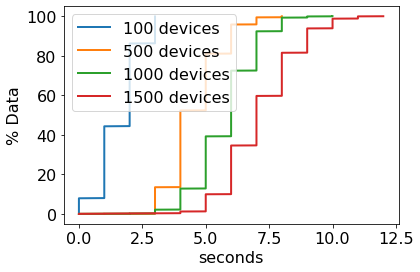

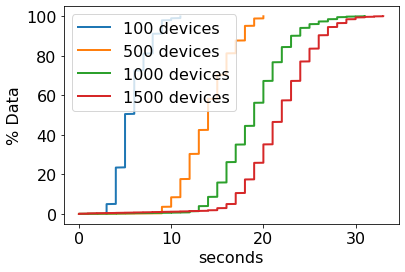

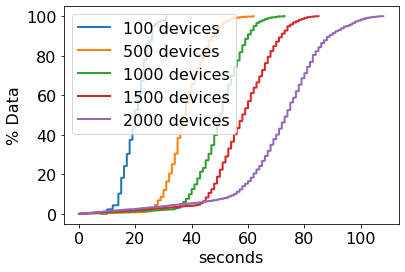

In [7]:
space_device_mappings = {2: range(100, 400, 100),
                         3: range(100, 400, 100), 
                         5: [100, 500, 1000],
                         7: [100, 500, 1000, 1500],
                         10: [100, 500, 1000, 1500],
                         15: [100, 500, 1000, 1500, 2000]}

for space in spacings:
    params = {'minute': 5, 
              'bitlist': 10000, 
              'move': False,
              'uniform': True, 
              'broadcastType': 'smart',
              'rate': 30000,
              'space': space,
              'devices': space_device_mappings[space]}

    delivery_cdf(data, params, 100)